In [14]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [15]:
features = pd.read_csv("data/leagues/processed/features.csv")
labels = pd.read_csv("data/leagues/processed/labels.csv")
labels = labels.iloc[:-10]

In [16]:
features.columns

Index(['HomeTeam', 'AwayTeam', 'Home_curr_pos', 'Away_curr_pos', 'Home_W/MP',
       'Away_W/MP', 'Home_D/MP', 'Away_D/MP', 'Home_L/MP', 'Away_L/MP',
       'HSoT/90', 'ASoT/90', 'HAS', 'AAS', 'HDS', 'ADS', 'past_h2h',
       'past_h2h1', 'past_h2h2', 'past_h2h3', 'home_past_form1',
       'away_past_form1', 'home_past_form2', 'away_past_form2',
       'home_past_form3', 'away_past_form3', 'home_past_form4',
       'away_past_form4', 'home_past_form5', 'away_past_form5', 'B365H',
       'B365D', 'B365A'],
      dtype='object')

In [17]:
categorical_columns = [
    "past_h2h",
    "past_h2h1",
    "past_h2h2",
    "past_h2h3",
    "home_past_form1",
    "home_past_form2",
    "home_past_form3",
    "away_past_form1",
    "away_past_form2",
    "away_past_form3",
]

In [18]:
categories = features[categorical_columns]
numericals = features.drop(categorical_columns, axis=1)
numericals.drop(["HomeTeam", "AwayTeam"], axis=1, inplace=True)

In [19]:
categories.tail()

,past_h2h,past_h2h1,past_h2h2,past_h2h3,home_past_form1,home_past_form2,home_past_form3,away_past_form1,away_past_form2,away_past_form3
7382,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0
7383,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
7384,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0
7385,0.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0
7386,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0


In [20]:
def convert_to_object(df):
    for col in df.columns:
        df[col] = df[col].astype(object)
        
convert_to_object(categories)

C:\Users\USER\AppData\Local\Temp\ipykernel_26620\3865939354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(object)


In [21]:
categories = pd.get_dummies(categories)

C:\Users\USER\AppData\Local\Temp\ipykernel_26620\855696081.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  categories = pd.get_dummies(categories)


In [69]:
def visualize_distribution(df):
    fig, axs = plt.subplots(len(df.columns), figsize=(10, 50))
    fig.suptitle("Features distribution", y=0.98)
    
    for i in range(len(df.columns)):
        axs[i].set_title(df.columns[i])
        axs[i].hist(df[df.columns[i]])

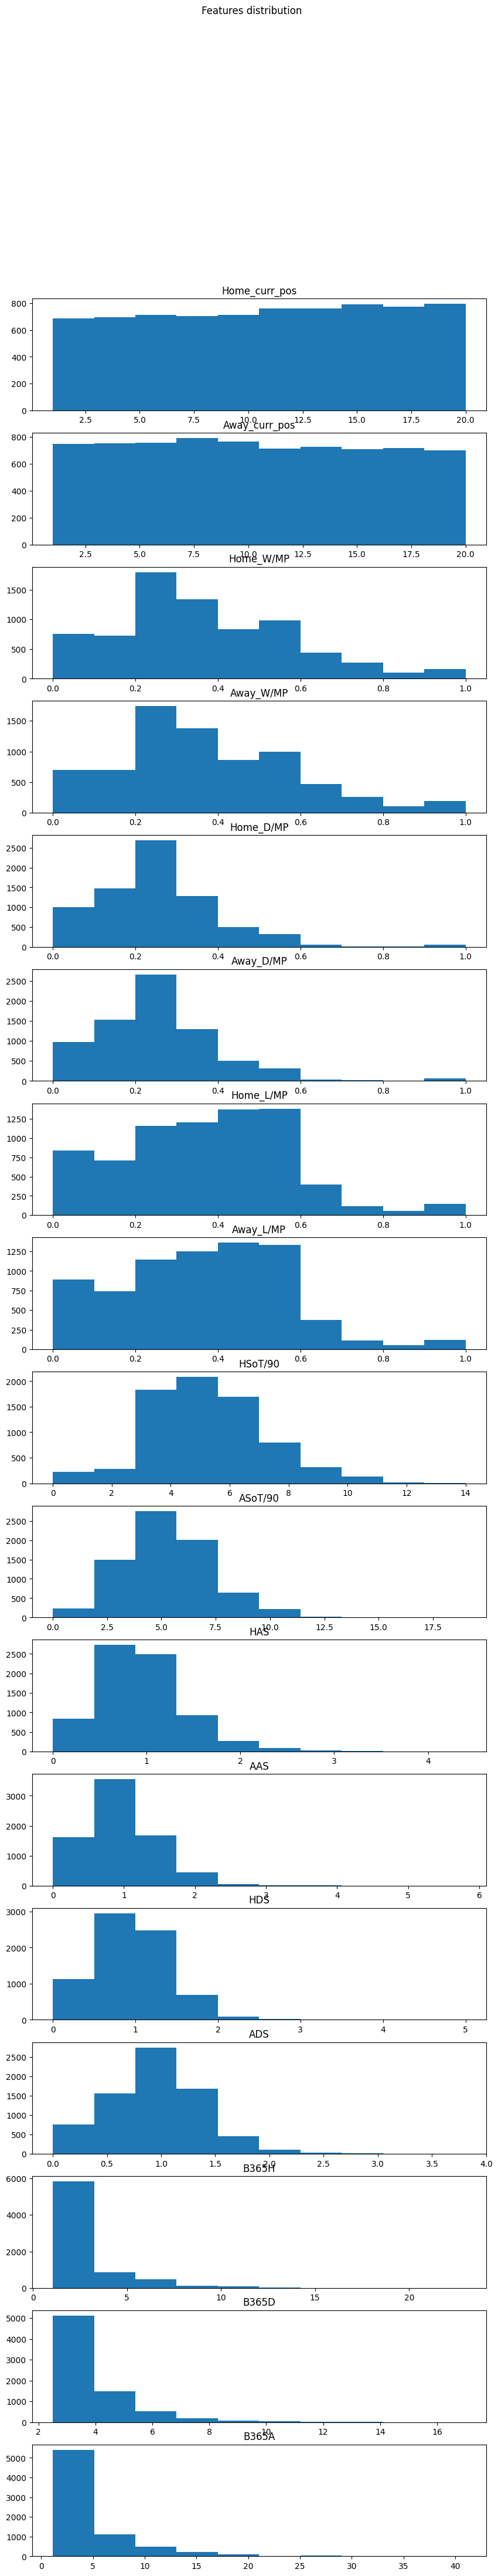

In [70]:
visualize_distribution(numericals)

In [22]:
numericals

,Home_curr_pos,Away_curr_pos,Home_W/MP,Away_W/MP,Home_D/MP,Away_D/MP,Home_L/MP,Away_L/MP,HSoT/90,ASoT/90,...,AAS,HDS,ADS,home_past_form4,away_past_form4,home_past_form5,away_past_form5,B365H,B365D,B365A
0,20.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.400,3.80,8.00
1,16.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.375,3.25,2.75
2,11.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.615,3.40,5.50
3,13.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.300,3.25,2.80
4,12.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.500,3.20,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,3.0,15.0,0.562500,0.266667,0.375000,0.200000,0.062500,0.533333,5.250000,4.000000,...,1.196709,0.523560,1.439153,2.0,0.0,0.0,0.0,1.450,4.50,7.00
7383,7.0,1.0,0.466667,0.866667,0.200000,0.066667,0.333333,0.066667,5.400000,5.733333,...,1.465969,0.718025,0.296296,2.0,2.0,2.0,1.0,3.400,3.50,2.10
7384,5.0,12.0,0.562500,0.312500,0.187500,0.187500,0.250000,0.500000,6.062500,4.125000,...,0.523560,1.151832,1.185185,0.0,2.0,0.0,2.0,1.670,4.00,5.00
7385,19.0,8.0,0.187500,0.466667,0.250000,0.200000,0.562500,0.333333,3.000000,3.866667,...,0.732984,1.151832,0.814815,2.0,2.0,2.0,1.0,5.000,3.80,1.70


In [23]:
categories

,past_h2h_0.0,past_h2h1_0.0,past_h2h1_1.0,past_h2h1_2.0,past_h2h2_0.0,past_h2h2_1.0,past_h2h2_2.0,past_h2h3_0.0,past_h2h3_1.0,past_h2h3_2.0,...,home_past_form3_2.0,away_past_form1_0.0,away_past_form1_1.0,away_past_form1_2.0,away_past_form2_0.0,away_past_form2_1.0,away_past_form2_2.0,away_past_form3_0.0,away_past_form3_1.0,away_past_form3_2.0
0,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,1,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
7383,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7384,1,1,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
7385,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

In [26]:
poly = PolynomialFeatures(interaction_only=True)
pols = poly.fit_transform(numericals)
df = np.hstack([pols, categories.values])

In [27]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

In [28]:
le = LabelEncoder()
labels = le.fit_transform(labels)

e:\premier-league-main\premier-league-main\venv\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
train_index, val_index = next(sss.split(df, labels))
X_train, X_val = df[train_index], df[val_index]
y_train, y_val = labels[train_index], labels[val_index]

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [31]:
models = [
    LogisticRegression(max_iter=10000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
]

# Train the models and print the classification reports
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{model.__class__.__name__}:")
    print(classification_report(y_val, y_pred))
    print("\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       218
           1       0.35      0.11      0.17       183
           2       0.56      0.80      0.66       338

    accuracy                           0.52       739
   macro avg       0.47      0.45      0.43       739
weighted avg       0.49      0.52      0.48       739



DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       218
           1       0.29      0.31      0.30       183
           2       0.55      0.51      0.53       338

    accuracy                           0.44       739
   macro avg       0.42      0.42      0.42       739
weighted avg       0.45      0.44      0.44       739



RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       218
           1       0.33      0.10      0.15       183
   

In [35]:
from keras.layers import Dense, Dropout, Input
from keras.models import Model
from keras.optimizers import Adam

In [36]:
def build_model(input_shape):
    stat_inputs = Input(shape=input_shape)
    stats = Dense(32, activation="relu")(stat_inputs)
    stats = Dropout(0.5)(stats)
    stats = Dense(60, activation="relu")(stats)
    stats = Dropout(0.5)(stats)
    stats = Dense(32, activation="relu")(stats)
    x = Dense(3, activation="softmax")(stats)

    model = Model(inputs=stat_inputs, outputs=x)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=Adam(1e-3),
        metrics=["accuracy"]
    )

    return model

model = build_model((df.shape[1],))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 260)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                8352      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 60)                1980      
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1952      
                                                                 
 dense_7 (Dense)             (None, 3)                 99  

In [37]:
hist = model.fit(X_train, y_train,
                     batch_size=32,
                     epochs=100,
                     validation_data=(X_val, y_val))

Epoch 1/100
208/208 [==============================] - 1s 3ms/step - loss: 1.1017 - accuracy: 0.4386 - val_loss: 1.0186 - val_accuracy: 0.5088
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.4823 - val_loss: 1.0115 - val_accuracy: 0.5413
Epoch 3/100
208/208 [==============================] - 0s 2ms/step - loss: 1.0099 - accuracy: 0.4995 - val_loss: 1.0017 - val_accuracy: 0.5277
Epoch 4/100
208/208 [==============================] - 0s 2ms/step - loss: 1.0027 - accuracy: 0.5188 - val_loss: 1.0025 - val_accuracy: 0.5345
Epoch 5/100
208/208 [==============================] - 0s 2ms/step - loss: 0.9962 - accuracy: 0.5215 - val_loss: 0.9943 - val_accuracy: 0.5359
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.9937 - accuracy: 0.5257 - val_loss: 1.0012 - val_accuracy: 0.5359
Epoch 7/100
208/208 [==============================] - 0s 2ms/step - loss: 0.9855 - accuracy: 0.5307 - val_loss: 0.9955 - val_accuracy: 0.5359

In [41]:
import pipeline.utils as U
tp = pd.read_csv("data/leagues/processed/to_predict.csv")
_, tp = U.split_features(tp)
cat = tp[categorical_columns]
convert_to_object(cat)
cat = pd.get_dummies(cat)
cat["home_past_form2_1.0"] = [0]*len(cat)
cat["away_past_form3_1.0"] = [0]*len(cat)
num = tp.drop(categorical_columns, axis=1)
num = poly.transform(num)
tp = np.hstack([num, cat.values])
tp = scaler.transform(tp)
print(tp.shape)
home = []
away = []
draw = []
prob = model.predict(tp)
for prob in prob:
    home.append(f'{prob[2]:.2f}')
    draw.append(f'{prob[1]:.2f}')
    away.append(f'{prob[0]:.2f}')
model_predictions = pd.read_csv('data/fixtures.csv', encoding='cp1252')
model_predictions = model_predictions[model_predictions['Div'] == 'E0'][['Date', 'Time', 'HomeTeam', 'AwayTeam']]
model_predictions['1'] = home
model_predictions['X'] = draw
model_predictions['2'] = away
model_predictions.to_csv(f'data/premier_league_predictions.csv', index=False)

(10, 260)
1/1 [==============================] - ETA: 0s

C:\Users\USER\AppData\Local\Temp\ipykernel_26620\3865939354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(object)
C:\Users\USER\AppData\Local\Temp\ipykernel_26620\3409479222.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.get_dummies(cat)


1/1 [==============================] - 0s 115ms/step
